<a href="https://colab.research.google.com/github/Isaac398/Microsoft-Project/blob/main/Heart_diagnostics_(ML_project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
data_heart = pd.read_csv('/content/heart_disease.csv.txt')
data_heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
X=data_heart.drop(['Thal','Ca','AHD'], axis=1)
Y=data_heart['AHD']

In [ ]:
print("(Rows, columns): " + str(data_heart.shape))
data_heart.columns

(Rows, columns): (303, 14)


Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [ ]:
data_heart.head()
print(X)

     Age  Sex     ChestPain  RestBP  ...  MaxHR  ExAng  Oldpeak  Slope
1     63    1       typical     145  ...    150      0      2.3      3
2     67    1  asymptomatic     160  ...    108      1      1.5      2
3     67    1  asymptomatic     120  ...    129      1      2.6      2
4     37    1    nonanginal     130  ...    187      0      3.5      3
5     41    0    nontypical     130  ...    172      0      1.4      1
..   ...  ...           ...     ...  ...    ...    ...      ...    ...
299   45    1       typical     110  ...    132      0      1.2      2
300   68    1  asymptomatic     144  ...    141      0      3.4      2
301   57    1  asymptomatic     130  ...    115      1      1.2      2
302   57    0    nontypical     130  ...    174      0      0.0      2
303   38    1    nonanginal     138  ...    173      0      0.0      1

[303 rows x 11 columns]


In [ ]:
print(Y)

1       No
2      Yes
3      Yes
4       No
5       No
      ... 
299    Yes
300    Yes
301    Yes
302    Yes
303     No
Name: AHD, Length: 303, dtype: object


In [ ]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [ ]:
ChestPain = {'typical': 0,'nontypical': 1,'asymptomatic':2,'nonanginal':3}
data_heart.ChestPain = [ChestPain[item] for item in data_heart.ChestPain]

In [ ]:
data_heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,0,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,2,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,2,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,1,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
data_heart.tail()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
298,57,0,2,140,241,0,0,123,1,0.2,2,0.0,2,Yes
299,45,1,0,110,264,0,0,132,0,1.2,2,0.0,2,Yes
300,68,1,2,144,193,1,0,141,0,3.4,2,2.0,2,Yes
301,57,1,2,130,131,0,0,115,1,1.2,2,1.0,2,Yes
302,57,0,1,130,236,0,2,174,0,0.0,2,1.0,1,Yes


In [ ]:
data_heart=data_heart.dropna()
data_heart.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [ ]:
# number of rows and columns in the dataset
data_heart.shape

(297, 14)

In [ ]:
data_heart.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [ ]:
# statistical measures about the data
data_heart.describe()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,1.959596,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768
std,9.049736,0.468500,0.868976,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [ ]:
# checking the distribution of Target Variable
data_heart['MaxHR'].value_counts()

162    11
160     9
163     9
152     8
172     7
       ..
129     1
128     1
127     1
124     1
71      1
Name: MaxHR, Length: 91, dtype: int64

In [ ]:
data_heart['AHD'].value_counts()

No     160
Yes    137
Name: AHD, dtype: int64

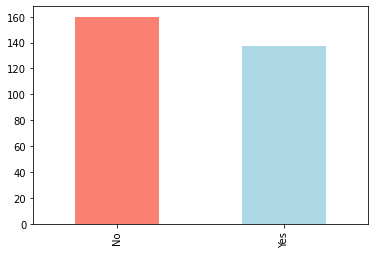

In [ ]:
data_heart.AHD.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

**Modeling data preparation **

In [ ]:
X = data_heart.drop(columns='AHD', axis=1)
Y = data_heart['AHD']

In [ ]:
print(X)


     Age  Sex  ChestPain  RestBP  Chol  ...  ExAng  Oldpeak  Slope   Ca  Thal
1     63    1          0     145   233  ...      0      2.3      3  0.0     0
2     67    1          2     160   286  ...      1      1.5      2  3.0     1
3     67    1          2     120   229  ...      1      2.6      2  2.0     2
4     37    1          3     130   250  ...      0      3.5      3  0.0     1
5     41    0          1     130   204  ...      0      1.4      1  0.0     1
..   ...  ...        ...     ...   ...  ...    ...      ...    ...  ...   ...
298   57    0          2     140   241  ...      1      0.2      2  0.0     2
299   45    1          0     110   264  ...      0      1.2      2  0.0     2
300   68    1          2     144   193  ...      0      3.4      2  2.0     2
301   57    1          2     130   131  ...      1      1.2      2  1.0     2
302   57    0          1     130   236  ...      0      0.0      2  1.0     1

[297 rows x 13 columns]


In [ ]:
print(Y)

1       No
2      Yes
3      Yes
4       No
5       No
      ... 
298    Yes
299    Yes
300    Yes
301    Yes
302    Yes
Name: AHD, Length: 297, dtype: object


In [ ]:
X = data_heart.iloc[:, :-1].values
y = data_heart.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(297, 13) (237, 13) (60, 13)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy  data : ', training_data_accuracy)

Accuracy  data :  0.8481012658227848


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy data : ', test_data_accuracy)

Accuracy data :  0.8


**SVM heart Diagnostics**

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(X_train,Y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
Y_pred = svc.predict(X_test)
cm = confusion_matrix(Y_test,Y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
sva =accuracy_score(Y_test,Y_pred)
print('accuracy score = ',accuracy_score(Y_test,Y_pred))
print("Classification Report",classification_report(Y_test,Y_pred))

confusion matrix:
 [[28  5]
 [ 6 21]]
accuracy score =  0.8166666666666667
Classification Report               precision    recall  f1-score   support

          No       0.82      0.85      0.84        33
         Yes       0.81      0.78      0.79        27

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60

